In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image file
uploaded = files.upload()

Saving image.png to image.png


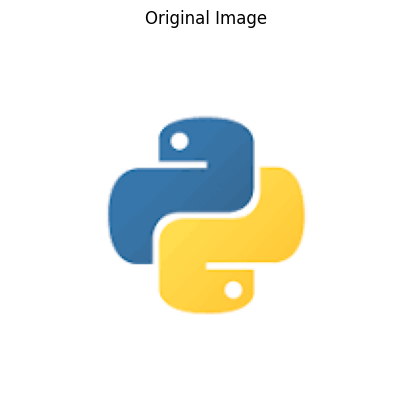

In [ ]:
# Load the image using OpenCV
image = cv2.imread('image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

 Different Image Filters

1. Blurring Filters
Blurring reduces image noise and detail, which can be useful for removing small artifacts.

- Averaging Blur: Each pixel is the average of its neighboring pixels.
- Gaussian Blur: Uses a Gaussian kernel for a smoother, more natural blur effect.
- Median Blur: Good for removing "salt and pepper" noise.

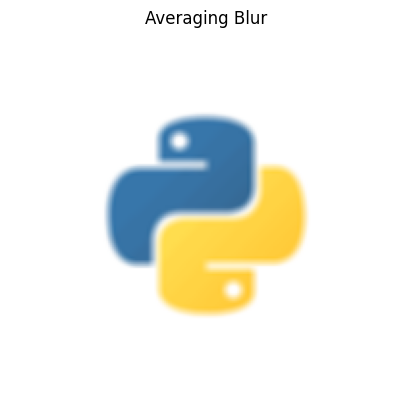

In [ ]:
# Apply Averaging Blur
average_blur = cv2.blur(image, (5, 5))
plt.imshow(cv2.cvtColor(average_blur, cv2.COLOR_BGR2RGB))
plt.title("Averaging Blur")
plt.axis('off')
plt.show()


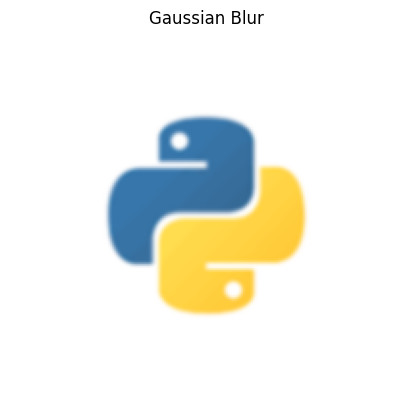

In [ ]:
# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')
plt.show()


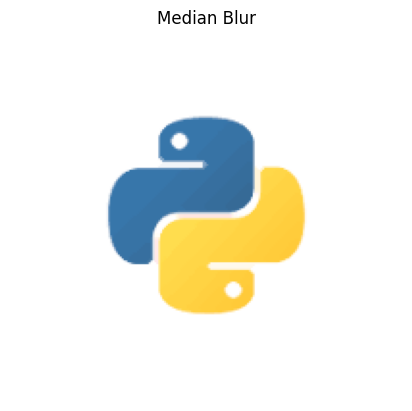

In [ ]:
# Apply Median Blur
median_blur = cv2.medianBlur(image, 5)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')
plt.show()


2. Sharpening
- enhances edges in the image, making details stand out.


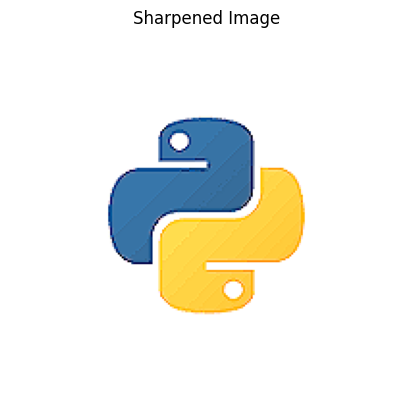

In [ ]:
# Sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply Sharpening Filter
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')
plt.show()


3. Edge Detection
highlights the boundaries of objects within the image.

- Sobel Edge Detection: Detects edges based on gradient changes along the x and y axes.
- Laplacian Edge Detection: Highlights edges by calculating the second derivative of the image.
- Canny Edge Detection: A multi-step process that finds edges based on intensity gradients and non-maximum suppression.

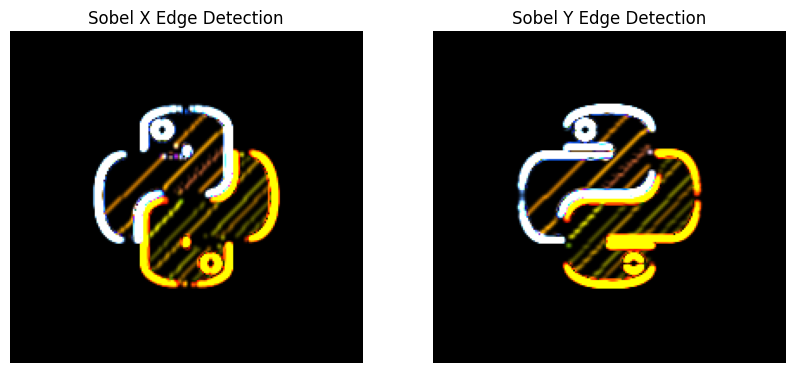

In [ ]:
# Apply Sobel edge detection in x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Y direction

# Display the Sobel edges
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title("Sobel X Edge Detection"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title("Sobel Y Edge Detection"), plt.axis('off')
plt.show()


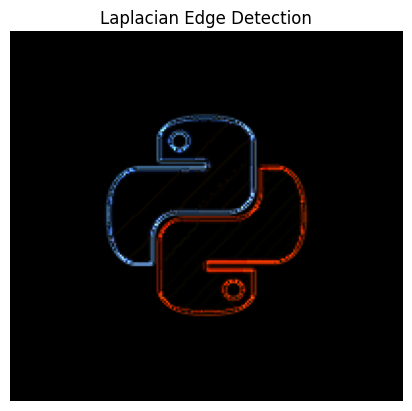

In [ ]:
# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(cv2.convertScaleAbs(laplacian), cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()


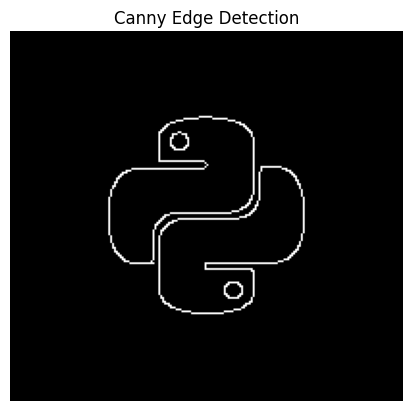

In [ ]:
# Apply Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


 Combining Filters for Effects

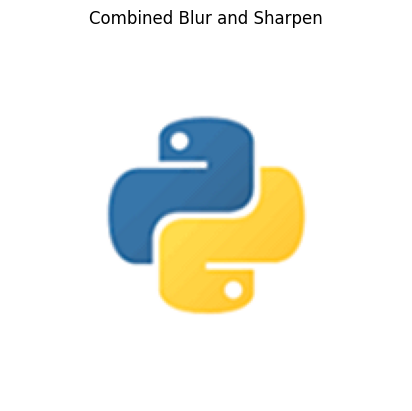

In [ ]:
# Apply Gaussian blur and then sharpen the result
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
combined_image = cv2.filter2D(blurred_image, -1, sharpening_kernel)
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title("Combined Blur and Sharpen")
plt.axis('off')
plt.show()


 Thresholding:

a simple method to create binary images by converting pixels based on intensity values.
1. Simple Thresholding
Description: A basic thresholding technique that converts an image to a binary form (black and white) by setting all pixel intensities above a certain threshold to the maximum value (white) and others to the minimum (black). It’s often used to create clear contrasts for segmentation or object detection.
Function: cv2.threshold(image, thresh_value, max_value, threshold_type)
2. Adaptive Thresholding
Description: Adaptive thresholding calculates thresholds based on the pixel’s neighborhood, which allows for better results in images with varying illumination. This method is ideal for images with uneven lighting or complex backgrounds.
Function: cv2.adaptiveThreshold(image, max_value, adaptive_method, threshold_type, block_size, C)


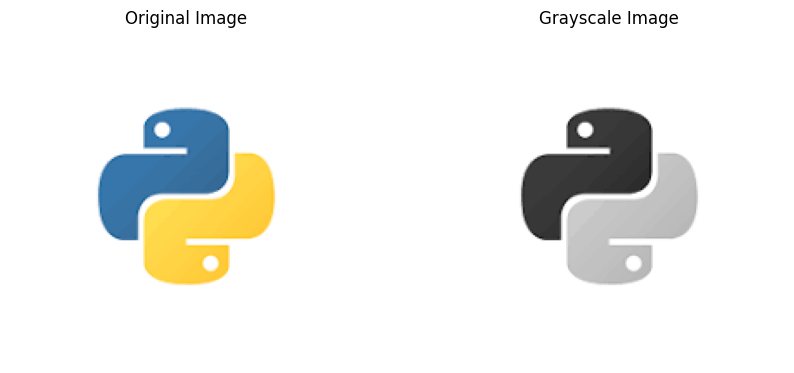

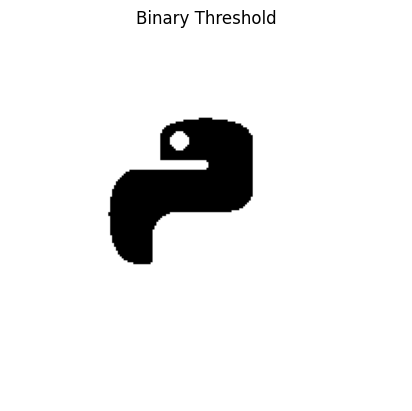

In [ ]:
image = cv2.imread('image.jpg')  # Replace with your image filename
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(image_rgb)
plt.title("Original Image"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image"), plt.axis('off')
plt.show()

# Step 3: Simple thresholding
_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary Threshold")
plt.axis('off')
plt.show()

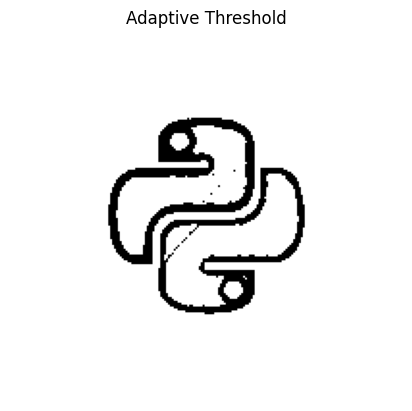

In [ ]:
# Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')
plt.show()

Histogram Equalization:

Adjusts image intensities to improve contrast by spreading out the most frequent intensity values. This is especially useful in images that are too bright or too dark, helping enhance detail in these areas by redistributing pixel values.

Function: cv2.equalizeHist(image)

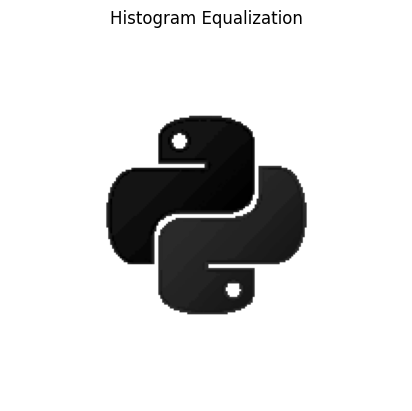

In [ ]:
# Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')
plt.show()

Brightness Adjustment:

Adjusts the brightness of an image by adding a constant to each pixel value. Increasing the constant makes the image brighter, while decreasing it can make it darker. This adjustment can be helpful for correcting underexposed images.

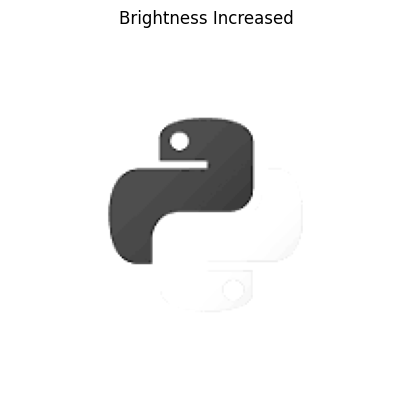

In [ ]:
# Increase brightness
bright_image = cv2.convertScaleAbs(gray_image, alpha=1, beta=50)
plt.imshow(bright_image, cmap='gray')
plt.title("Brightness Increased")
plt.axis('off')
plt.show()

Contrast Adjustment:

Adjusts the contrast by multiplying each pixel value by a scaling factor, stretching or compressing the pixel intensity levels. A higher factor (>1) increases contrast by making dark areas darker and bright areas brighter.

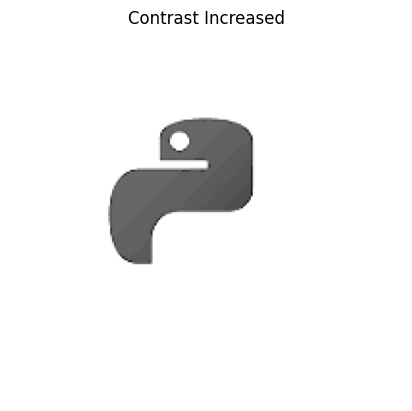

In [ ]:
# Increase contrast
contrast_image = cv2.convertScaleAbs(gray_image, alpha=1.5, beta=0)
plt.imshow(contrast_image, cmap='gray')
plt.title("Contrast Increased")
plt.axis('off')
plt.show()
